In [1]:
import library as lib
from skyfield.api import load
from datetime import timedelta, datetime
"""
Algorithm to determine inter-satellite communication.
This main needs the library.py file to work. 
Indexing starts from 0 !
"""

'\nAlgorithm to determine inter-satellite communication.\nThis main needs the library.py file to work. \nIndexing starts from 0 !\n'

In [6]:
#########################################################################
### >>>                   Parameter definion                      <<< ###

# define tle filename
tle_file = 'sat_data.txt'
# define threatarea filename (.shp) 
# if EPSG:4326 used, than transformer=False, if ESRI:53042 used than transformer=True
threatarea_file = 'ESRI53042_testfile.shp'
transformer_toggle = False
# define start of the simulation (year,month,day,hour,minutes,sek)
sim_start = datetime(2024, 2, 26, 0, 0, 0)
# define end of your simulation (year,month,day,hour,minutes,sek)
sim_end = datetime(2024, 2, 26, 1, 0, 0)
# define time steps in [sek]
time_step = 60
# number of satellite to investigate (starts from 0)
sat_number = 0
# Add beamwidth of antenna for Satellite to attack and attacking one [deg]
theta_target = 40 # Full Width of Half Maximum attacked satellite  [0-180°]
theta_attack = 10 # Full Width of Half Maximum attacking satellite [0-180°]
# Set value to True if the attacking beamwidth is more than 60° or if you want a 
# higher resolution of vectors to imitate FWHM of attacking satellite
# calc time increases if True
huge_theta_toggle = False
# Change the Antenna direction of compromised satellite for the given intervall
# 6 cases available:
# Case A: Omnidirectional
# Case B: flight direction
# Case C: opposite flight direction
# Case D: nadir pointing 
# Case E: opposite nadir pointing
# Case F: left in respect to flight direction 
# Case G: right in respect to flight direction
orientation = 'A'
# thickness of atmosphere in [km]
atmosphere = 0
# max distance in [km]
max_distance = 1000
max_d_toggle = False

### >>>                   Parameter definion                      <<< ###
#########################################################################
lib.input_checker_future(theta_target,time_step,huge_theta_toggle,theta_attack,sat_number,atmosphere,transformer_toggle,orientation)

### Display used threatarea
(Could be used to idenify if shapefile is in EPSG:4326 or ESRI:53042 given, to adjust 'transformer' in case)

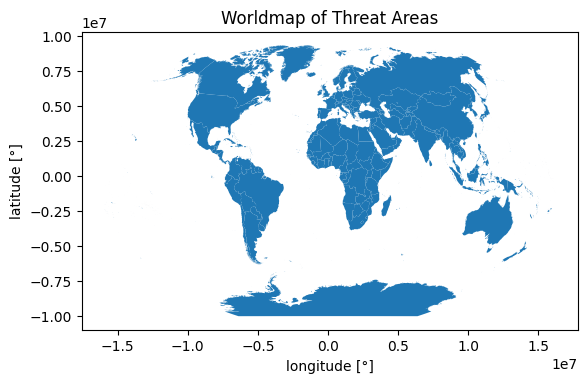

In [7]:
lib.plot_shapefile(threatarea_file,transformer_toggle)

In [8]:
satellites = load.tle_file(tle_file)
start_time,end_time = lib.sim_time(sim_start,sim_end)
satellites = lib.earthsatellite_extension(satellites)
lib.generate_satellite_motion_data(start_time,end_time,time_step,satellites)
lib.plot(satellites)
sat_list = lib.add_satellite_from_earth(satellites)
lib.line_of_sight_points(sat_list)
lib.line_of_sight_ellipsoid(sat_list,atmosphere,sim_start,time_step)
lib.intersatellite_vector(sat_list)
lib.angle_speed(sat_list,time_step)
lib.relative_speed(sat_list)
lib.distance(sat_list)
lib.los_periods(sat_list)
lib.flight_vector(sat_list)
lib.set_frequency_future(sat_list,theta_target,theta_attack)
lib.pointing_direction_03(sat_list,orientation)

### Examination of specific communication periods

In [9]:
if orientation != 'A':
    lib.create_antenna_cone(sat_list,huge_theta_toggle)
    lib.create_lat_lon_from_intersection(sat_list,sim_start,time_step,transformer_toggle)
    lib.antenna_cone_is_inside_threatarea(sat_list,threatarea_file) 
    lib.set_threshold_future(sat_list,max_distance,max_d_toggle)
else: 
    lib.create_antenna_cone(sat_list,huge_theta_toggle)
    lib.create_lat_lon_from_intersection(sat_list,sim_start,time_step,transformer_toggle)
    lib.antenna_cone_is_inside_threatarea(sat_list,threatarea_file) 
    lib.set_threshold_future_spherical(sat_list,max_distance,max_d_toggle)
lib.threshold_filter_future_multi(sat_list,sat_number,sim_start,sim_end,time_step,orientation)

--------------------------------------------------------------------
Communication contact periods with SALSAT 6910 97
Between: 2024-02-26 00:00:00 UTC - 2024-02-26 01:00:00 UTC
Assumptions:
- attitude of attacked antenna omnidirectional 
- beamwidth of attacking satellite 30°
- special threatarea
--------------------------------------------------------------------

Check AQUA 7074 98 [Sat No.1] and SALSAT 6910 97 [Sat No.0]

    Match in period No. 0 	 Duration of 660 sek 	 from: 2024-02-26 00:31:00 UTC - 2024-02-26 00:41:00 UTC	 [(31, 41)] Multiaccess with: [M0]

In [10]:
lib.show_threatlevel_multiaccess(sat_list,sat_number)

----------------------------------------------------------------------------------
   Multiaccess while specific contact periods with SALSAT 6910 97
----------------------------------------------------------------------------------

   Sat No.1 AQUA 7074 98
         Period No.0: [M0]  


## Definition of malicous satellite

In [11]:
#########################################################################
### >>>                   Parameter definion                      <<< ###

# define satellite to examined, number one is the compromised satellite,
# number two is the malicous one. 
number_one = sat_number
number_two = 1

### >>>                                                           <<< ###
#########################################################################

## Total communication periods

In [12]:
com_periods = lib.all_communication_periods(sat_list,number_one,number_two)
max_distance = lib.get_maximum_los_list(lib.distance_for_los(sat_list,number_one,number_two,com_periods))
max_anglespeed = lib.max_angular_speed_los(sat_list,number_one,number_two,com_periods)
max_velo = lib.get_maximum_los_list(lib.iteration_list_extraction_01(sat_list[number_one].doppler[number_two],com_periods))
lib.print_contact_info(sat_list,number_one,number_two,sim_start,time_step,max_anglespeed,max_distance,max_velo)

Detailed information to the communication periods for AQUA 7074 98 with SALSAT 6910 97:
---------------------------------------------------------------------------------------------------------------------------
Period - Starttime -------------------- Endtime ------------------ Duration --- max Rotspeed -- max Distance -- max Speed -
---------------------------------------------------------------------------------------------------------------------------
No. 0 	 from 2024-02-26 00:31:00 UTC - 2024-02-26 00:41:00 UTC    600 sek 	0.0629 deg/s 	4386.91 km 	4.80 km/s


## Total line of sights per period

## Special Period 

In [26]:
#########################################################################
### >>>                   Parameter definion                      <<< ###

# Add a number of Period which is interesting for you 
period = 0
time_step_for_antenna_groundtrack = 0

### >>>                                                           <<< ###
#########################################################################

## Parameter per period

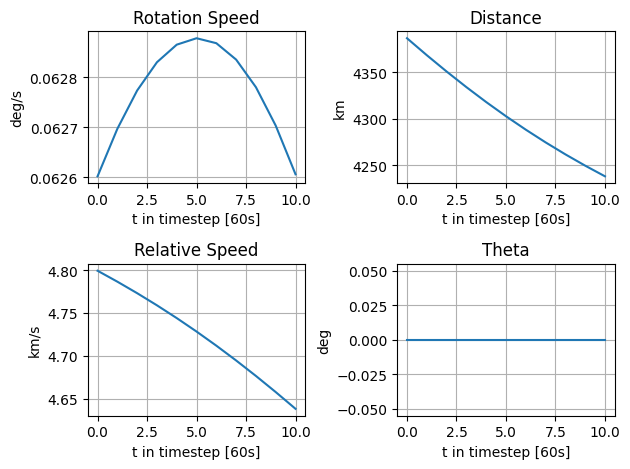

In [27]:
anglespeed,distance,velo = lib.data_per_period(sat_list,number_one,number_two,com_periods)
theta_list = lib.pointing_direction_02(sat_list,orientation,number_one,number_two,com_periods)
lib.plot_period(anglespeed,distance,velo,theta_list,time_step,period)

## Groundtrack for Antenna 

In [28]:
lib.show_antenna_groundtrack(sat_list,time_step_for_antenna_groundtrack,sat_no_1=0,sat_no_2=1)

## Groundtrack for specific line of sight period

In [29]:
lib.show_ground_track_for_specific_communication_period(sat_list,orientation,number_one,number_two,com_periods,period)

## Visualization for specific line of sight period

In [30]:
lib.plot_commmunication_period_with_earth(sat_list,orientation,number_one,number_two,period)

## Data for contact

In [31]:
mesh = lib.point_to_sphere_distances(sat_list,number_one,number_two,com_periods,period)
lib.plot_communication_interactive(mesh,period)

In [32]:
#########################################################################
### >>>                   Parameter definion                      <<< ###

# Add a number of timestep which is interesting and a frequency 
# to calcaulate the freespace loss
specific_time_step = 1
specific_frequency = 2.28e9

### >>>                   Parameter definion                      <<< ###
#########################################################################

Free space loss for this link is -51.22 dB.


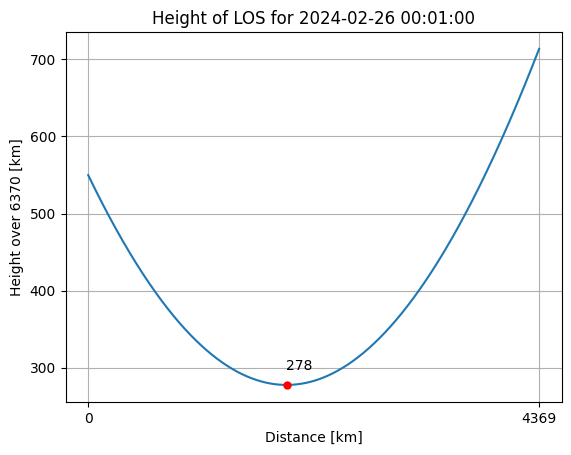

In [33]:
lib.plot_communication_detailed(mesh,specific_time_step,time_step,distance,sim_start,sat_list[0].theta_3dB)

## Free Space Loss 

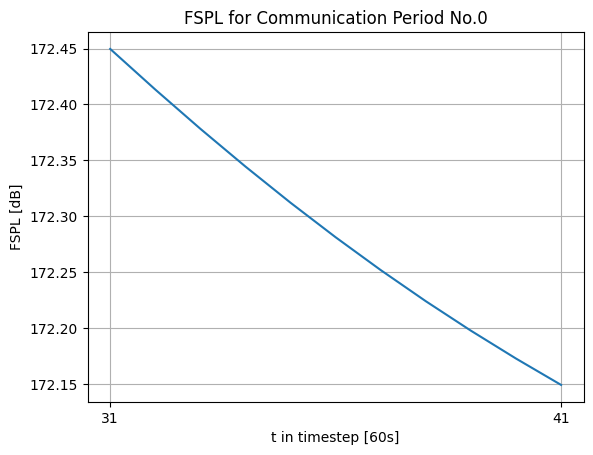

In [34]:
lib.plot_fspl(sat_list,number_one,number_two,time_step,specific_frequency,period)